In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_comparisons(x, y1, y2, y_label, save_loc, y1_err=None, y2_err=None, y3_err=None):
    # create an index list for x-values
    x_values = range(len(x))
    y1 = np.array(y1)
    y2 = np.array(y2)
    #y3 = np.array(y3)

    fig, ax = plt.subplots()
    # add std err if over multiple seeds
    if y1_err is not None:
        y1_err = np.array(y1_err)
        y2_err = np.array(y2_err)
        #y3_err = np.array(y3_err)
        ax.fill_between(x_values, y1-y1_err, y1+y1_err, color='black', alpha=0.1)
        ax.fill_between(x_values, y2-y2_err, y2+y2_err, color='deeppink', alpha=0.1)
        #ax.fill_between(x_values, y3-y3_err, y3+y3_err, color='indigo', alpha=0.1)
    ax.plot(x_values, y1, marker='o', color='black', label='RLHF')
    ax.plot(x_values, y2, marker='o', color='deeppink', label='Feature Preference (Prag-Lang)')
    #ax.plot(x_values, y3, marker='o', color='indigo', label='Feature Preference (Prag-Oracle)')

    # set x-ticks to be the comparison values
    ax.set_xticks(x_values)
    ax.set_xticklabels(x)
    ax.yaxis.set_ticks(np.arange(0.5, 1.05, 0.1))

    ax.set_xlabel('Number of Comparisons')
    ax.set_ylabel(y_label)
    ax.set_ylim(ymin=0.5)
    ax.legend(loc='lower right')
    plt.savefig(save_loc + '/0' + y_label + '_comparisons.pdf')

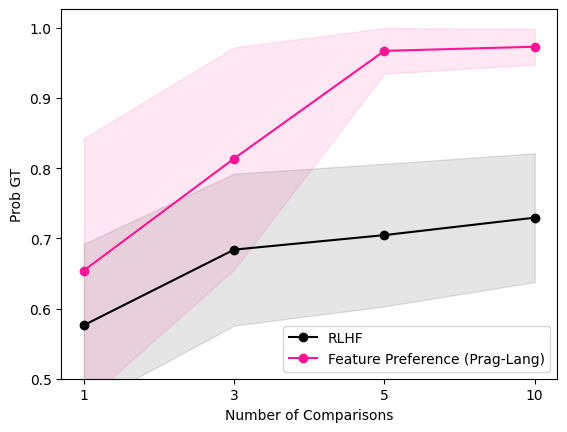

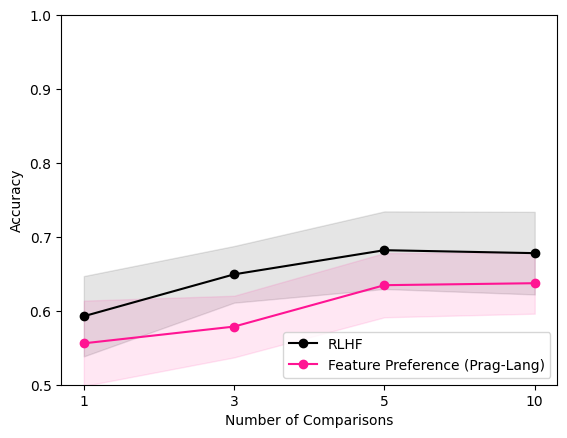

In [5]:
comparisons = [1,3,5,10]
rlhf_probs = [0.5762280708245933, 0.6838921957549949, 0.7045853509818514, 0.72943461928914]
rlhf_probs_err = [0.11590173948617491, 0.10824500465912348, 0.10160610429766928, 0.09178736032473653]
rlhf_correct = [0.5926666666666667, 0.6493333333333333, 0.6819999999999999, 0.678]
rlhf_cor_err = [0.05431561220125589, 0.03831836686973821, 0.052467007167019464, 0.05586736792961548]
featureprefshuman_probs = [0.6541210571565622, 0.813713475232426, 0.967073192622885, 0.9729352064244956]
featureprefshuman_probs_err = [0.18837542366559562, 0.15822140007916297, 0.03247494527818016, 0.02544543405519546]
featureprefshuman_correct = [0.5559999999999999, 0.5786666666666667, 0.6346666666666667, 0.6373333333333333]
featureprefshuman_cor_err = [0.057754558262266734, 0.041692060367417336, 0.043424761685277376, 0.041227423618066764]
featureprefsgt_probs = [0.6799935701603339, 0.8818498662167759, 0.9159150430675862, 0.9998916783014933]
featureprefsgt_probs_err = [0.20504338916681658, 0.061084433840345474, 0.06281622396706607, 7.35563826324299e-05]
featureprefsgt_correct = [0.6086666666666667, 0.6513333333333333, 0.6966666666666667, 0.7053333333333333]
featureprefsgt_cor_err = [0.06342195661820382, 0.04086194110594022, 0.03574190514512606, 0.04483499443911865]

save_loc = '../results/flights/average/'
plot_comparisons(comparisons, rlhf_probs, featureprefshuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefshuman_probs_err)
plot_comparisons(comparisons, rlhf_correct, featureprefshuman_correct, 'Accuracy', save_loc, rlhf_cor_err, featureprefshuman_cor_err)